In [620]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/airbnb/neighbourhoods.geojson
/kaggle/input/airbnb/Data-Project.csv


In [621]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap
#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [622]:
df=pd.read_csv('/kaggle/input/airbnb/Data-Project.csv',index_col=0)

In [623]:
df.head(2)

id_airbnb  host_id    borough neighbourhood_group  latitude  longitude  \
0       2595     2845  Manhattan             Midtown  40.75362  -73.98377   
1       3831     4869   Brooklyn        Clinton Hill  40.68514  -73.95976   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt    225              10                 48   
1  Entire home/apt     89               1                295   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.39                               1                 1   
1               4.67                               1                 1   

                                         description  accommodates  zipcode  \
0  Beautiful, spacious skylit studio in the heart...             1    10018   
1  Urban retreat: enjoy 500 s.f. floor in 1899 br...             3    11238   

          neighborhood  total_restaurants_1  total_restaurants_reviews_1  \
0  Chelsea and Clinton                  4.0                        964.0   
1     Central Brooklyn                  NaN                          NaN   

   restaurants_avg_rating_1  restaurants_yelp_5  total_restaurants_reviews_5  \
0                     3.875                78.0                      40022.0   
1                       NaN                27.0                       4086.0   

   restaurants_avg_rating_5  total_bars_1  total_bars_reviews_1  \
0                  4.057692           1.0                  10.0   
1                  4.240741           NaN                   NaN   

   bars_avg_rating_1  bars_yelp_5  total_bars_reviews_5  bars_avg_rating_5  \
0                4.5         21.0                8701.0           4.000000   
1                NaN         12.0                 790.0           4.208333   

       nearest_station  distance_to_station  crime_score  \
0  42nd St - Bryant Pk             0.093386     3.666079   
1          Classon Ave             0.417452     3.554833   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                      7                  94.0                     9.0   
1                     75                  90.0                     9.0   

   review_scores_cleanliness  review_scores_checkin  \
0                        9.0                   10.0   
1                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                  9.0   
1                          9.0                    10.0                  9.0   

   total_restaurants_1mile  total_restaurants_reviews_1mile  \
0                    245.0                         145949.0   
1                     90.0                          14108.0   

   restaurants_avg_rating_1mile  restaurants_yelp_2mile  \
0                      4.022449                   503.0   
1                      4.205556                   204.0   

   total_restaurants_reviews_2mile  restaurants_avg_rating_2mile  \
0                         280531.0                      4.045726   
1                          38246.0                      4.117647   

   total_bars_1mile  total_bars_reviews_1mile  bars_avg_rating_1mile  \
0              57.0                   21609.0               4.035088   
1              34.0                    3678.0               4.088235   

   bars_yelp_2mile  total_bars_reviews_2mile  bars_avg_rating_2mile  
0            135.0                   47706.0               4.007407  
1             59.0                    6714.0               4.135593

In [624]:
#lets see the missing value

In [625]:
df.isnull().sum()

id_airbnb                              0
host_id                                0
borough                                0
neighbourhood_group                    0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
reviews_per_month                      0
calculated_host_listings_count         0
availability_365                       0
description                            0
accommodates                           0
zipcode                                0
neighborhood                           0
total_restaurants_1                24795
total_restaurants_reviews_1        24795
restaurants_avg_rating_1           24795
restaurants_yelp_5                  2823
total_restaurants_reviews_5         2823
restaurants_avg_rating_5            2823
total_bars_1                       36531
total_bars_revie

In [626]:
# Airbnb - Review scores are missing for some listing
# Yelp - Restauarnts and bars which are not within 0.1,0.5,1 and 2 miles are missing
# Crime -  Crime scores 7 litings are missing

In [627]:
# Airbnb - Only  review_scores_rating is important to us as it's the weighted average of all the reviews rating

In [628]:
# Percentage of missing
print('Percentage of missing values in review scores rating',100*(df['review_scores_rating'].isnull().sum()/len(df)))

Percentage of missing values in review scores rating 21.493747199478594


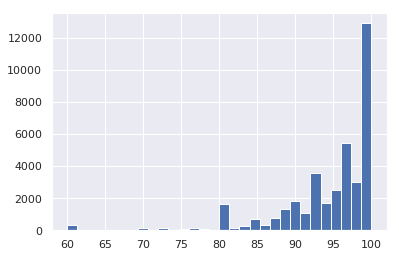

In [629]:
#lets see the distribution
df['review_scores_rating'].hist(bins=30,range=(60,100))

In [630]:
#Mean
print('Mean of review scores rating is', df['review_scores_rating'].mean())
#Median
print('Median of review scores rating is', df['review_scores_rating'].median())

Mean of review scores rating is 93.88766376961992
Median of review scores rating is 96.0


In [631]:
# Lets see the distribution of number of reviews and ratings, is there some correlation?

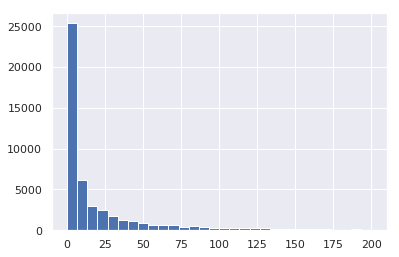

In [632]:
df['number_of_reviews'].hist(bins=30,range=(0,200))

In [633]:
#Mean
print('Mean number of reviews is', df['number_of_reviews'].mean())
#Median
print('Median number of review s is', df['number_of_reviews'].median())

Mean number of reviews is 25.25937920078211
Median number of review s is 6.0


In [634]:
# Correlation
df['number_of_reviews'].corr(df['review_scores_rating'])

0.03703105540779058

In [635]:
# let's fill the missing values with the average ratings
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(),inplace=True)

In [636]:
# Crime - Let's inspect the missing values
df[df['crime_score'].isnull()]

id_airbnb    host_id    borough neighbourhood_group  latitude  \
9328     7724136   40585961  Manhattan     Lower East Side  40.72092   
12243    9956933   10338497  Manhattan     Upper East Side  40.78614   
14932   13016082   12127963  Manhattan         East Harlem  40.78804   
20263   17774316  121352443  Manhattan         East Harlem  40.78866   
24800   21427176  154949847  Manhattan      Hell's Kitchen  40.76893   
38909   34278223    3577413  Manhattan  Financial District  40.70599   
39293   34509926  121861644  Manhattan  Financial District  40.70719   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
9328   -73.98849     Private room     85               1                  0   
12243  -73.95541     Private room     50              10                  0   
14932  -73.95382     Private room     95               5                  4   
20263  -73.95435     Private room     62               3                  3   
24800  -73.99654  Entire home/apt    288               3                 88   
38909  -74.00515  Entire home/apt    139               3                  5   
39293  -74.00664  Entire home/apt    215               3                  2   

       reviews_per_month  calculated_host_listings_count  availability_365  \
9328                0.00                               1                 0   
12243               0.00                               1                 0   
14932               0.09                               1                 0   
20263               0.09                               1                 0   
24800               3.62                               2               332   
38909               0.70                               1                 0   
39293               0.29                               1                 0   

                                             description  accommodates  \
9328   Be in the heart of the action. This location c...             1   
12243  My apartment is on the UES, 96th and Madison, ...             2   
14932  At Madison Avenue and 96th Street, this is the...             2   
20263  2 roommates who are barley home. The room has ...             1   
24800  Enjoy Breathtaking views of the NYC skyline fr...             6   
38909  Unique modern and extremely spacious studio ap...             1   
39293  One bedroom apartment in brand new luxury high...             5   

         zipcode       neighborhood  total_restaurants_1  \
9328   100022289          Manhattan                  NaN   
12243      10129  Midtown Manhattan                  NaN   
14932      10129  Midtown Manhattan                  NaN   
20263      10129  Midtown Manhattan                  NaN   
24800       7093          Manhattan                  NaN   
38909      10270          Manhattan                  NaN   
39293      10270          Manhattan                  NaN   

       total_restaurants_reviews_1  restaurants_avg_rating_1  \
9328                           NaN                       NaN   
12243                          NaN                       NaN   
14932                          NaN                       NaN   
20263                          NaN                       NaN   
24800                          NaN                       NaN   
38909                          NaN                       NaN   
39293                          NaN                       NaN   

       restaurants_yelp_5  total_restaurants_reviews_5  \
9328                  NaN                          NaN   
12243                 NaN                          NaN   
14932                 NaN                          NaN   
20263                 NaN                          NaN   
24800                 NaN                          NaN   
38909                 NaN                          NaN   
39293                 NaN                          NaN   

       restaurants_avg_rating_5  total_bars_1  total_bars_reviews_1  \
9328                        NaN           NaN    

In [637]:
# We see there are zipcodes which are not valid, but the listings are in Midtown manhattan so it's wise to replace missing values 
# with crime score in Manhattan

In [638]:
print('Average crime score in Manhattan is', df[df['borough']=='Manhattan']['crime_score'].mean())

Average crime score in Manhattan is 3.5432589288395726


In [639]:
# let's fill the missing values with the average crime score
df['crime_score'].fillna(df[df['borough']=='Manhattan']['crime_score'].mean(),inplace=True)

In [640]:
# Yelp -- Here we were able to fetch only limited data, so for now let's inpute the missing values with 0 
# which says there are no restaurants/bars near by-- which might not be completely True

In [641]:
# before we fill missing values with 0, let's replace reviews score for Airbnb with mean, though we are not using it right now..
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mean(),inplace=True)
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].mean(),inplace=True)
df['review_scores_checkin'].fillna(df['review_scores_checkin'].mean(),inplace=True)
df['review_scores_communication'].fillna(df['review_scores_communication'].mean(),inplace=True)
df['review_scores_location'].fillna(df['review_scores_location'].mean(),inplace=True)
df['review_scores_value'].fillna(df['review_scores_value'].mean(),inplace=True)


In [642]:
# Yelp--fill with NA
df.fillna(0,inplace=True)

In [643]:
df.isnull().sum()

id_airbnb                          0
host_id                            0
borough                            0
neighbourhood_group                0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
description                        0
accommodates                       0
zipcode                            0
neighborhood                       0
total_restaurants_1                0
total_restaurants_reviews_1        0
restaurants_avg_rating_1           0
restaurants_yelp_5                 0
total_restaurants_reviews_5        0
restaurants_avg_rating_5           0
total_bars_1                       0
total_bars_reviews_1               0
bars_avg_rating_1                  0
bars_yelp_5                        0
t

In [644]:
# Before we do the final scoring for the listing let's see how the ratings look like

In [645]:
# Airbnb - scores are out of 100
# CCrime - scores are out of 5
# Yelp - scores are out of 5
# So let's scale everything to 10-- Final score will be out of 10

In [646]:
df['review_scores_rating']= df['review_scores_rating']/(10.0)

In [647]:
#df['review_scores_rating']=round(df['review_scores_rating'],2)

In [648]:
#df['review_scores_rating']=df['review_scores_rating'].astype(int)

In [649]:
df['review_scores_rating']

0        9.400000
1        9.000000
2        9.000000
3        9.000000
4        8.400000
           ...   
49093    9.388766
49094    9.388766
49095    9.388766
49096    9.388766
49097    9.388766
Name: review_scores_rating, Length: 49098, dtype: float64

In [650]:
print('MAX',df['review_scores_rating'].max())
print('MIN',df['review_scores_rating'].min())

MAX 10.0
MIN 2.0


In [651]:
feq = df.groupby('neighbourhood_group')['review_scores_rating'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['review_scores_rating'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 5, vmax = 10)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'review_scores_rating'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3


In [652]:
# Let's do sam for crime score

In [653]:
df['crime_score']= df['crime_score']*2.0

In [654]:
print('MAX',df['crime_score'].max())
print('MIN',df['crime_score'].min())

MAX 7.54483085
MIN 6.381336082000001


In [655]:
feq = df.groupby('neighbourhood_group')['crime_score'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['crime_score'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 6.4, vmax = 7.6)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'crime_score'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

In [656]:
# Lets do this for restaurants that are within 2 miles

In [657]:
df[['restaurants_avg_rating_1','bars_avg_rating_1','restaurants_avg_rating_5','bars_avg_rating_5','restaurants_avg_rating_1mile',
    'bars_avg_rating_1mile','restaurants_avg_rating_2mile','bars_avg_rating_2mile']]=df[['restaurants_avg_rating_1','bars_avg_rating_1','restaurants_avg_rating_5','bars_avg_rating_5','restaurants_avg_rating_1mile',
    'bars_avg_rating_1mile','restaurants_avg_rating_2mile','bars_avg_rating_2mile']].mul(2)

In [658]:
feq = df.groupby('neighbourhood_group')['restaurants_avg_rating_2mile'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['restaurants_avg_rating_2mile'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 5, vmax = 10)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'restaurants_avg_rating_2mile'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

In [659]:
# Bars aka Night life

In [660]:
feq = df.groupby('neighbourhood_group')['bars_avg_rating_2mile'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['bars_avg_rating_2mile'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 5, vmax = 10)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'bars_avg_rating_2mile'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

In [661]:
# We see a lot of yellow area because we did not have a lot of data related to bars-- This can be improved

In [662]:
# Here we are trying to distinguish between litings based on restaurants/night life but sometimes that might not be the preference of the user
# So, going to extreme on the weight can hamper the recommendation engine
# Let create a combined score based on average rating and distance from the listing without penalizing

In [663]:
# Rest-0.1 mile-- Assign weight 4
# Rest-0.5 mile-- Assign weight 3
# Rest-1 mile-- Assign weight 2
# Rest-2 mile-- Assign weight 1

In [664]:
df['restaurants_score']=((df['restaurants_avg_rating_1']*4.0)+(df['restaurants_avg_rating_5']*3.0)+(df['restaurants_avg_rating_1mile']*2.0)+(df['restaurants_avg_rating_2mile']*1.0))/10.0

In [665]:
print('MAX',df['restaurants_score'].max())
print('MIN',df['restaurants_score'].min())

MAX 9.842857142857143
MIN 0.0


In [666]:
feq = df.groupby('neighbourhood_group')['restaurants_score'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['restaurants_score'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 0, vmax = 9)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'restaurants_score'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

In [667]:
# As we were able to fetch limited bars let's not give more weights to closest bars, soo
# Bar-0.1 mile-- Assign weight 3
# Bar-0.5 mile-- Assign weight 3
# Bar-1 mile-- Assign weight 2
# Bar-2 mile-- Assign weight 2

In [668]:
df['bars_score']=((df['bars_avg_rating_1']*3.0)+(df['bars_avg_rating_5']*3.0)+(df['bars_avg_rating_1mile']*2.0)+(df['bars_avg_rating_2mile']*1.0))/10.0

In [669]:
df['bars_score']

0        7.515517
1        4.987413
2        4.880256
3        7.681509
4        7.288690
           ...   
49093    3.948810
49094    4.728667
49095    3.948810
49096    5.650000
49097    2.464327
Name: bars_score, Length: 49098, dtype: float64

In [670]:
print('MAX',df['bars_score'].max())
print('MIN',df['bars_score'].min())

MAX 8.833333333333332
MIN 0.0


In [671]:
feq = df.groupby('neighbourhood_group')['bars_score'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['bars_score'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 0, vmax = 9)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'bars_score'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

In [672]:
# Now let' give listing the final score
# As per the survey the ranking of people while booking an Airbnb listing is as follows"
# 1. Airbnb Rating-- Assign weight 4
# 2 Safety of Neighborhood--Assign weight of 3
# 3. Restaurants -- Assign weight of 2
# 4. Night Life -- Assign weight of 1
# So, we will give weights as per user's preference(which can change)
df['score']=((df['review_scores_rating']*4.0)+(df['crime_score']*3.0)+(df['restaurants_score']*2.0)+(df['bars_score']*1.0))/10.0

In [673]:
print('MAX',df['score'].max())
print('MIN',df['score'].min())

MAX 8.796108433917173
MIN 2.87205599


In [674]:
feq = df.groupby('neighbourhood_group')['score'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['score'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 2, vmax = 10)
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'score'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

In [675]:
df.to_csv('Scoring.csv')

In [676]:
# This does a pretty good job of rating an Airbnb listing based of Night life, Rest and safety..
# Can we improve??
# Can we take in number of reviews??
# Can we use Bayesian average ratings??

In [677]:
# Before we move forward let's see how the orignal Ratings of Airbnb Vary from out Calculated Ratings

In [678]:
from folium.plugins import Search
#https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/plugin-Search.ipynb

In [679]:
feq = df.groupby('neighbourhood_group')['score'].mean().sort_values(ascending=True)
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam = pd.merge(adam, feq, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam.set_index('neighbourhood')['score'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 2, vmax = 10)
colormap = branca.colormap.LinearColormap(
    colors=['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f'],
    index=feq['score'].quantile([0.2,0.4,0.6,0.8]),
    vmin=min,
    vmax=max
)

colormap.caption="Airbnb Scores of the Neighborhoods in NYC"

colormap

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'score'],
                                                      labels=True,
                                                      sticky=False),
               style_function = lambda x: {
    'fillColor': colormap(x['properties']['score']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
},
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
colormap.add_to(map3)
stategeo = folium.GeoJson(
    adam,
    name='NYC',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood_group', 'score'],
        aliases=['neighbourhood', 'Airbnb Score'], 
        localize=True
    )
).add_to(map3)
statesearch = Search(
    layer=stategeo,
    geom_type='Polygon',
    placeholder='Search for a Neighorhood',
    collapsed=False,
    search_label='neighbourhood',
    weight=3
).add_to(map3)
map3

In [680]:
''' 
#Keyword Error
feq1 = df.groupby('neighbourhood_group')['review_scores_rating'].mean().sort_values(ascending=True)
feq1 = pd.DataFrame([feq1])
feq1 = feq1.transpose()
adam1 = gpd.read_file('/kaggle/input/airbnb/neighbourhoods.geojson')
adam1 = pd.merge(adam1, feq1, left_on='neighbourhood',right_on='neighbourhood_group')
map_dict = adam1.set_index('neighbourhood')['review_scores_rating'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = 2, vmax = 10)
colormap = branca.colormap.LinearColormap(
    colors=['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f'],
    index=feq1['review_scores_rating'].quantile([0.2,0.4,0.6,0.8,1.0]),
    vmin=min,
    vmax=max
)

colormap.caption="Airbnb Inital Rating of the Neighborhoods in NYC"

colormap

map3 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
folium.GeoJson(data=adam1,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'review_scores_rating'],
                                                      labels=True,
                                                      sticky=False),
               style_function = lambda x: {
    'fillColor': colormap(x['properties']['review_scores_rating']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
},
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
colormap.add_to(map3)
stategeo = folium.GeoJson(
    adam1,
    name='NYC',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood_group','review_scores_rating'],
        aliases=['neighbourhood', 'Airbnb Initial Rating'], 
        localize=True
    )
).add_to(map3)
statesearch = Search(
    layer=stategeo,
    geom_type='Polygon',
    placeholder='Search for a Neighorhood',
    collapsed=False,
    search_label='neighbourhood',
    weight=3
).add_to(map3)
map3
'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-680-8475e39278a0>, line 52)

In [ ]:
adam1.head()